<a href="https://colab.research.google.com/github/endar1y12/Project-Analisis-sentimen/blob/main/Analisis_Sentimen_Queen_Of_Tears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
import matplotlib.pyplot as plt

# Download modul NLTK jika belum diinstall
nltk.download('vader_lexicon')

# Inisialisasi sentiment analyzer
sid = SentimentIntensityAnalyzer()

factory = StemmerFactory()
stemmer = factory.create_stemmer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#load df
df = pd.read_csv('QueenOfTears.csv')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1784082166294724684,Sat Apr 27 04:48:29 +0000 2024,0,sampe saat ini blm ikutan fomo buat nonton Que...,1784082166294724684,NaN,NaN,in,Middle of Nowhere,0,0,0,https://twitter.com/melonminii/status/17840821...,395749841,melonminii
1,1784081786533974367,Sat Apr 27 04:46:59 +0000 2024,0,kyutttttt baekhong forever #QueenOfTears,1784081786533974367,NaN,NaN,in,Philippines,0,0,0,https://twitter.com/trinadiaries/status/178408...,1465877780768432129,trinadiaries
2,1784081708826173446,Sat Apr 27 04:46:40 +0000 2024,0,Ayo yg malem ini gabut kita nonton episode ter...,1784081708826173446,NaN,NaN,in,Jakarta Capital Region,0,0,0,https://twitter.com/Numerounooo13/status/17840...,1434871087490224139,Numerounooo13
3,1784045756988735821,Sat Apr 27 04:42:47 +0000 2024,0,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,1784080730706080135,NaN,convomfs,in,She/Her,0,0,0,https://twitter.com/dlsyaa7/status/17840807307...,1328665060252663809,dlsyaa7
4,1784080602893103246,Sat Apr 27 04:42:17 +0000 2024,0,queen of tears selesai minggu ini,1784080602893103246,NaN,NaN,in,NaN,0,0,0,https://twitter.com/modzarrellaa/status/178408...,1461373788587626500,modzarrellaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,1783461167081644051,Thu Apr 25 11:40:51 +0000 2024,0,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,1783461167081644051,NaN,NaN,in,ljn.,0,2,0,https://twitter.com/daegaal_/status/1783461167...,1345674969678639105,daegaal_
1214,1783461049162932515,Thu Apr 25 11:40:23 +0000 2024,0,Queen of tears nihh tak sedap mana pun jalan c...,1783461049162932515,NaN,NaN,in,NaN,0,0,0,https://twitter.com/WhiteSugar143/status/17834...,1632724099083669504,WhiteSugar143
1215,1783458410564030724,Thu Apr 25 11:39:15 +0000 2024,1,@zizi_jjang okayyy terimakasih,1783460761618219041,NaN,zizi_jjang,in,NaN,0,0,0,https://twitter.com/mlyndwyps/status/178346076...,1902614618,mlyndwyps
1216,1783460256326336944,Thu Apr 25 11:37:14 +0000 2024,0,Hari ini syuting pickmetrip udah selesai nanti...,1783460256326336944,NaN,NaN,in,NaN,0,0,0,https://twitter.com/siwipm99/status/1783460256...,454499802,siwipm99


In [ ]:
#menghapus df duplikat
df.drop_duplicates(subset = "full_text", keep="first", inplace=True)
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1784082166294724684,Sat Apr 27 04:48:29 +0000 2024,0,sampe saat ini blm ikutan fomo buat nonton Que...,1784082166294724684,NaN,NaN,in,Middle of Nowhere,0,0,0,https://twitter.com/melonminii/status/17840821...,395749841,melonminii
1,1784081786533974367,Sat Apr 27 04:46:59 +0000 2024,0,kyutttttt baekhong forever #QueenOfTears,1784081786533974367,NaN,NaN,in,Philippines,0,0,0,https://twitter.com/trinadiaries/status/178408...,1465877780768432129,trinadiaries
2,1784081708826173446,Sat Apr 27 04:46:40 +0000 2024,0,Ayo yg malem ini gabut kita nonton episode ter...,1784081708826173446,NaN,NaN,in,Jakarta Capital Region,0,0,0,https://twitter.com/Numerounooo13/status/17840...,1434871087490224139,Numerounooo13
3,1784045756988735821,Sat Apr 27 04:42:47 +0000 2024,0,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,1784080730706080135,NaN,convomfs,in,She/Her,0,0,0,https://twitter.com/dlsyaa7/status/17840807307...,1328665060252663809,dlsyaa7
4,1784080602893103246,Sat Apr 27 04:42:17 +0000 2024,0,queen of tears selesai minggu ini,1784080602893103246,NaN,NaN,in,NaN,0,0,0,https://twitter.com/modzarrellaa/status/178408...,1461373788587626500,modzarrellaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,1783461167081644051,Thu Apr 25 11:40:51 +0000 2024,0,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,1783461167081644051,NaN,NaN,in,ljn.,0,2,0,https://twitter.com/daegaal_/status/1783461167...,1345674969678639105,daegaal_
1214,1783461049162932515,Thu Apr 25 11:40:23 +0000 2024,0,Queen of tears nihh tak sedap mana pun jalan c...,1783461049162932515,NaN,NaN,in,NaN,0,0,0,https://twitter.com/WhiteSugar143/status/17834...,1632724099083669504,WhiteSugar143
1215,1783458410564030724,Thu Apr 25 11:39:15 +0000 2024,1,@zizi_jjang okayyy terimakasih,1783460761618219041,NaN,zizi_jjang,in,NaN,0,0,0,https://twitter.com/mlyndwyps/status/178346076...,1902614618,mlyndwyps
1216,1783460256326336944,Thu Apr 25 11:37:14 +0000 2024,0,Hari ini syuting pickmetrip udah selesai nanti...,1783460256326336944,NaN,NaN,in,NaN,0,0,0,https://twitter.com/siwipm99/status/1783460256...,454499802,siwipm99


In [ ]:
#mengambil kolom yang akan digunakan
df = df[[ 'full_text']]
df

,full_text
0,sampe saat ini blm ikutan fomo buat nonton Que...
1,kyutttttt baekhong forever #QueenOfTears
2,Ayo yg malem ini gabut kita nonton episode ter...
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...
4,queen of tears selesai minggu ini
...,...
1213,Aishh shibaalll queen of tears ep 14 xvjsjs bi...
1214,Queen of tears nihh tak sedap mana pun jalan c...
1215,@zizi_jjang okayyy terimakasih
1216,Hari ini syuting pickmetrip udah selesai nanti...


In [ ]:
import re

def clean_text(text):
    # Menghapus username Twitter (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Menghapus teks non-alfanumerik dan karakter tunggal
    text = re.sub(r'\W', ' ', text)
    # Menghapus karakter RT (retweet)
    text = re.sub(r'\bRT\b', '', text)
    # Menghapus URL
    text = re.sub(r'https?://\S+', '', text)
    # Menghapus karakter yang bukan alfabet atau angka
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    # Menghapus kata-kata dengan panjang satu karakter
    text = re.sub(r'\b\w\b', '', text)
    # Menghapus karakter yang lebih dari satu spasi berturut-turut
    text = re.sub(r'\s+', ' ', text)
    # Menghapus spasi di awal dan akhir teks
    text = text.strip()
    return text

# Terapkan fungsi pembersihan teks pada kolom 'full_text' dan simpan hasilnya dalam kolom 'clean_df'
df['clean_text'] = df['full_text'].apply(clean_text)

# Tampilkan dfFrame setelah pembersihan teks
df


<ipython-input-8-301500d32ce0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['full_text'].apply(clean_text)


,full_text,clean_text
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton Que...
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever QueenOfTears
2,Ayo yg malem ini gabut kita nonton episode ter...,Ayo yg malem ini gabut kita nonton episode ter...
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,Ngapain gw mah bahas tebak tebakan ending quee...
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini
...,...,...
1213,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,Aishh shibaalll queen of tears ep 14 xvjsjs bi...
1214,Queen of tears nihh tak sedap mana pun jalan c...,Queen of tears nihh tak sedap mana pun jalan c...
1215,@zizi_jjang okayyy terimakasih,okayyy terimakasih
1216,Hari ini syuting pickmetrip udah selesai nanti...,Hari ini syuting pickmetrip udah selesai nanti...


In [ ]:
#mengubah huruf besar ke huruf kecil
df['clean_text'] = df['clean_text'].str.lower()
df

<ipython-input-9-a4acc2013dda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].str.lower()


,full_text,clean_text
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton que...
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever queenoftears
2,Ayo yg malem ini gabut kita nonton episode ter...,ayo yg malem ini gabut kita nonton episode ter...
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,ngapain gw mah bahas tebak tebakan ending quee...
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini
...,...,...
1213,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,aishh shibaalll queen of tears ep 14 xvjsjs bi...
1214,Queen of tears nihh tak sedap mana pun jalan c...,queen of tears nihh tak sedap mana pun jalan c...
1215,@zizi_jjang okayyy terimakasih,okayyy terimakasih
1216,Hari ini syuting pickmetrip udah selesai nanti...,hari ini syuting pickmetrip udah selesai nanti...


In [ ]:
# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
df['token_text'] = df['clean_text'].apply(tokenize_text)
df

<ipython-input-10-ece8ef858b9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_text'] = df['clean_text'].apply(tokenize_text)


,full_text,clean_text,token_text
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton que...,"[sampe, saat, ini, blm, ikutan, fomo, buat, no..."
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever queenoftears,"[kyutttttt, baekhong, forever, queenoftears]"
2,Ayo yg malem ini gabut kita nonton episode ter...,ayo yg malem ini gabut kita nonton episode ter...,"[ayo, yg, malem, ini, gabut, kita, nonton, epi..."
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,ngapain gw mah bahas tebak tebakan ending quee...,"[ngapain, gw, mah, bahas, tebak, tebakan, endi..."
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini,"[queen, of, tears, selesai, minggu, ini]"
...,...,...,...
1213,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,aishh shibaalll queen of tears ep 14 xvjsjs bi...,"[aishh, shibaalll, queen, of, tears, ep, 14, x..."
1214,Queen of tears nihh tak sedap mana pun jalan c...,queen of tears nihh tak sedap mana pun jalan c...,"[queen, of, tears, nihh, tak, sedap, mana, pun..."
1215,@zizi_jjang okayyy terimakasih,okayyy terimakasih,"[okayyy, terimakasih]"
1216,Hari ini syuting pickmetrip udah selesai nanti...,hari ini syuting pickmetrip udah selesai nanti...,"[hari, ini, syuting, pickmetrip, udah, selesai..."


In [ ]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens
df['stopword_text'] = df['token_text'].apply(remove_stopwords)
df

<ipython-input-11-136cb52031c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword_text'] = df['token_text'].apply(remove_stopwords)


,full_text,clean_text,token_text,stopword_text
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton que...,"[sampe, saat, ini, blm, ikutan, fomo, buat, no...","[sampe, blm, ikutan, fomo, nonton, queen, of, ..."
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever queenoftears,"[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]"
2,Ayo yg malem ini gabut kita nonton episode ter...,ayo yg malem ini gabut kita nonton episode ter...,"[ayo, yg, malem, ini, gabut, kita, nonton, epi...","[ayo, yg, malem, gabut, nonton, episode, nya, ..."
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,ngapain gw mah bahas tebak tebakan ending quee...,"[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebakan, endi..."
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini,"[queen, of, tears, selesai, minggu, ini]","[queen, of, tears, selesai, minggu]"
...,...,...,...,...
1213,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,aishh shibaalll queen of tears ep 14 xvjsjs bi...,"[aishh, shibaalll, queen, of, tears, ep, 14, x...","[aishh, shibaalll, queen, of, tears, ep, 14, x..."
1214,Queen of tears nihh tak sedap mana pun jalan c...,queen of tears nihh tak sedap mana pun jalan c...,"[queen, of, tears, nihh, tak, sedap, mana, pun...","[queen, of, tears, nihh, sedap, jalan, citer, ..."
1215,@zizi_jjang okayyy terimakasih,okayyy terimakasih,"[okayyy, terimakasih]","[okayyy, terimakasih]"
1216,Hari ini syuting pickmetrip udah selesai nanti...,hari ini syuting pickmetrip udah selesai nanti...,"[hari, ini, syuting, pickmetrip, udah, selesai...","[syuting, pickmetrip, udah, selesai, malem, ko..."


In [ ]:
# Fungsi untuk stemming
def stem_text(tokens):
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens
df['stemmed_text'] = df['stopword_text'].apply(stem_text)
df

<ipython-input-12-72fa69a25ff4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_text'] = df['stopword_text'].apply(stem_text)


,full_text,clean_text,token_text,stopword_text,stemmed_text
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton que...,"[sampe, saat, ini, blm, ikutan, fomo, buat, no...","[sampe, blm, ikutan, fomo, nonton, queen, of, ...","[sampe, blm, ikut, fomo, nonton, queen, of, te..."
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever queenoftears,"[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]"
2,Ayo yg malem ini gabut kita nonton episode ter...,ayo yg malem ini gabut kita nonton episode ter...,"[ayo, yg, malem, ini, gabut, kita, nonton, epi...","[ayo, yg, malem, gabut, nonton, episode, nya, ...","[ayo, yg, malem, gabut, nonton, episode, nya, ..."
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,ngapain gw mah bahas tebak tebakan ending quee...,"[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebak, ending..."
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini,"[queen, of, tears, selesai, minggu, ini]","[queen, of, tears, selesai, minggu]","[queen, of, tears, selesai, minggu]"
...,...,...,...,...,...
1213,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,aishh shibaalll queen of tears ep 14 xvjsjs bi...,"[aishh, shibaalll, queen, of, tears, ep, 14, x...","[aishh, shibaalll, queen, of, tears, ep, 14, x...","[aishh, shibaalll, queen, of, tears, ep, 14, x..."
1214,Queen of tears nihh tak sedap mana pun jalan c...,queen of tears nihh tak sedap mana pun jalan c...,"[queen, of, tears, nihh, tak, sedap, mana, pun...","[queen, of, tears, nihh, sedap, jalan, citer, ...","[queen, of, tears, nihh, sedap, jalan, citer, ..."
1215,@zizi_jjang okayyy terimakasih,okayyy terimakasih,"[okayyy, terimakasih]","[okayyy, terimakasih]","[okayyy, terimakasih]"
1216,Hari ini syuting pickmetrip udah selesai nanti...,hari ini syuting pickmetrip udah selesai nanti...,"[hari, ini, syuting, pickmetrip, udah, selesai...","[syuting, pickmetrip, udah, selesai, malem, ko...","[syuting, pickmetrip, udah, selesai, malem, ko..."


In [ ]:
#Fungsi untuk preprocessing gabungkan
def preprocessing(text):
    # Tokenisasi
    tokens = tokenize_text(text)

    # Menghapus stopwords
    filtered_tokens = remove_stopwords(tokens)

    # Stemming
    stemmed_tokens = stem_text(filtered_tokens)

    # Join stemmed tokens
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text
df['preprocessing_result'] = df['stemmed_text'].apply(lambda x: ' '.join(x))
df

<ipython-input-13-980245396043>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessing_result'] = df['stemmed_text'].apply(lambda x: ' '.join(x))


,full_text,clean_text,token_text,stopword_text,stemmed_text,preprocessing_result
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton que...,"[sampe, saat, ini, blm, ikutan, fomo, buat, no...","[sampe, blm, ikutan, fomo, nonton, queen, of, ...","[sampe, blm, ikut, fomo, nonton, queen, of, te...",sampe blm ikut fomo nonton queen of tears ntr ...
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever queenoftears,"[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]",kyutttttt baekhong forever queenoftears
2,Ayo yg malem ini gabut kita nonton episode ter...,ayo yg malem ini gabut kita nonton episode ter...,"[ayo, yg, malem, ini, gabut, kita, nonton, epi...","[ayo, yg, malem, gabut, nonton, episode, nya, ...","[ayo, yg, malem, gabut, nonton, episode, nya, ...",ayo yg malem gabut nonton episode nya queen of...
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,ngapain gw mah bahas tebak tebakan ending quee...,"[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebak, ending...",ngapain gw mah bahas tebak tebak ending queen ...
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini,"[queen, of, tears, selesai, minggu, ini]","[queen, of, tears, selesai, minggu]","[queen, of, tears, selesai, minggu]",queen of tears selesai minggu
...,...,...,...,...,...,...
1213,Aishh shibaalll queen of tears ep 14 xvjsjs bi...,aishh shibaalll queen of tears ep 14 xvjsjs bi...,"[aishh, shibaalll, queen, of, tears, ep, 14, x...","[aishh, shibaalll, queen, of, tears, ep, 14, x...","[aishh, shibaalll, queen, of, tears, ep, 14, x...",aishh shibaalll queen of tears ep 14 xvjsjs bi...
1214,Queen of tears nihh tak sedap mana pun jalan c...,queen of tears nihh tak sedap mana pun jalan c...,"[queen, of, tears, nihh, tak, sedap, mana, pun...","[queen, of, tears, nihh, sedap, jalan, citer, ...","[queen, of, tears, nihh, sedap, jalan, citer, ...",queen of tears nihh sedap jalan citer boring k...
1215,@zizi_jjang okayyy terimakasih,okayyy terimakasih,"[okayyy, terimakasih]","[okayyy, terimakasih]","[okayyy, terimakasih]",okayyy terimakasih
1216,Hari ini syuting pickmetrip udah selesai nanti...,hari ini syuting pickmetrip udah selesai nanti...,"[hari, ini, syuting, pickmetrip, udah, selesai...","[syuting, pickmetrip, udah, selesai, malem, ko...","[syuting, pickmetrip, udah, selesai, malem, ko...",syuting pickmetrip udah selesai malem korea sa...


In [ ]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["preprocessing_result"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["preprocessing_result"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["preprocessing_result"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["preprocessing_result"]]
df.head()

<ipython-input-15-bf6a60daeb55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["preprocessing_result"]]
<ipython-input-15-bf6a60daeb55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["preprocessing_result"]]
<ipython-input-15-bf6a60daeb55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,full_text,clean_text,token_text,stopword_text,stemmed_text,preprocessing_result,Positive,Negative,Neutral,Compound
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton que...,"[sampe, saat, ini, blm, ikutan, fomo, buat, no...","[sampe, blm, ikutan, fomo, nonton, queen, of, ...","[sampe, blm, ikut, fomo, nonton, queen, of, te...",sampe blm ikut fomo nonton queen of tears ntr ...,0.0,0.137,0.863,-0.2263
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever queenoftears,"[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]",kyutttttt baekhong forever queenoftears,0.0,0.000,1.000,0.0000
2,Ayo yg malem ini gabut kita nonton episode ter...,ayo yg malem ini gabut kita nonton episode ter...,"[ayo, yg, malem, ini, gabut, kita, nonton, epi...","[ayo, yg, malem, gabut, nonton, episode, nya, ...","[ayo, yg, malem, gabut, nonton, episode, nya, ...",ayo yg malem gabut nonton episode nya queen of...,0.0,0.160,0.840,-0.2263
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,ngapain gw mah bahas tebak tebakan ending quee...,"[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebak, ending...",ngapain gw mah bahas tebak tebak ending queen ...,0.0,0.061,0.939,-0.2263
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini,"[queen, of, tears, selesai, minggu, ini]","[queen, of, tears, selesai, minggu]","[queen, of, tears, selesai, minggu]",queen of tears selesai minggu,0.0,0.322,0.678,-0.2263


In [ ]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

<ipython-input-16-94dd7710f6e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = sentiment


,full_text,clean_text,token_text,stopword_text,stemmed_text,preprocessing_result,Positive,Negative,Neutral,Compound,Sentiment
0,sampe saat ini blm ikutan fomo buat nonton Que...,sampe saat ini blm ikutan fomo buat nonton que...,"[sampe, saat, ini, blm, ikutan, fomo, buat, no...","[sampe, blm, ikutan, fomo, nonton, queen, of, ...","[sampe, blm, ikut, fomo, nonton, queen, of, te...",sampe blm ikut fomo nonton queen of tears ntr ...,0.0,0.137,0.863,-0.2263,Negative
1,kyutttttt baekhong forever #QueenOfTears,kyutttttt baekhong forever queenoftears,"[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]","[kyutttttt, baekhong, forever, queenoftears]",kyutttttt baekhong forever queenoftears,0.0,0.000,1.000,0.0000,Neutral
2,Ayo yg malem ini gabut kita nonton episode ter...,ayo yg malem ini gabut kita nonton episode ter...,"[ayo, yg, malem, ini, gabut, kita, nonton, epi...","[ayo, yg, malem, gabut, nonton, episode, nya, ...","[ayo, yg, malem, gabut, nonton, episode, nya, ...",ayo yg malem gabut nonton episode nya queen of...,0.0,0.160,0.840,-0.2263,Negative
3,@convomfs Ngapain?? gw mah bahas tebak-tebakan...,ngapain gw mah bahas tebak tebakan ending quee...,"[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebakan, endi...","[ngapain, gw, mah, bahas, tebak, tebak, ending...",ngapain gw mah bahas tebak tebak ending queen ...,0.0,0.061,0.939,-0.2263,Negative
4,queen of tears selesai minggu ini,queen of tears selesai minggu ini,"[queen, of, tears, selesai, minggu, ini]","[queen, of, tears, selesai, minggu]","[queen, of, tears, selesai, minggu]",queen of tears selesai minggu,0.0,0.322,0.678,-0.2263,Negative


In [ ]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['preprocessing_result'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df['preprocessing_result'].astype('U'))
print(text_tf)


  (0, 4102)	0.30272139067460846
  (0, 1293)	0.40234342495369585
  (0, 2901)	0.2629123913847138
  (0, 242)	0.21671545407342496
  (0, 2727)	0.4256301967295194
  (0, 3738)	0.08024902936598462
  (0, 2782)	0.0800387829596504
  (0, 3112)	0.08024902936598462
  (0, 2714)	0.16783772917463086
  (0, 1255)	0.38582119743962473
  (0, 1646)	0.299438654598083
  (0, 621)	0.3227254263739065
  (0, 3275)	0.24310742779411715
  (1, 3115)	0.20935078595377563
  (1, 1258)	0.6382609577145101
  (1, 429)	0.3760560438754429
  (1, 2121)	0.6382609577145101
  (2, 490)	0.3445224586602699
  (2, 2737)	0.26981510702184563
  (2, 1160)	0.26630925129059896
  (2, 2307)	0.408700763089341
  (2, 4203)	0.23825908402216636
  (2, 410)	0.421961451953718
  (2, 1293)	0.5095293130453198
  (2, 3738)	0.10162768985254231
  :	:
  (1214, 3902)	0.2215664196022762
  (1214, 560)	0.18064695923476926
  (1214, 3661)	0.2483005507570039
  (1214, 1460)	0.16207428096436424
  (1214, 2069)	0.18559803272507516
  (1214, 4163)	0.15104565746718912
  (1214

In [ ]:
#split data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Sentiment'], test_size=0.2, random_state=24)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)
df['Sentiment'].value_counts()

Jumlah Data Uji: (244, 4255)
Jumlah Data Latih: (972, 4255)


Sentiment
Negative    716
Neutral     305
Positive    195
Name: count, dtype: int64

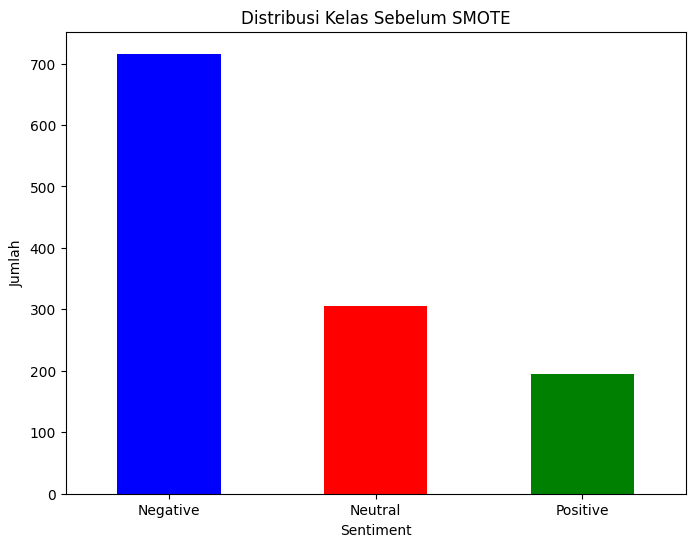

In [ ]:
# Visualisasi distribusi kelas sebelum SMOTE
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

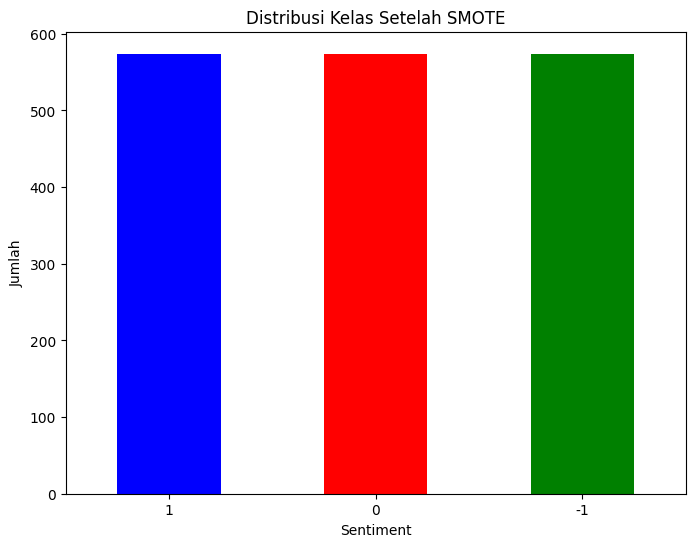

In [ ]:
#Perform algoritma K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE


# Mengonversi label menjadi numerik
label_dict = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
y_train_numeric = [label_dict[label] for label in y_train]
y_test_numeric = [label_dict[label] for label in y_test]

# Menggunakan SMOTE untuk oversampling data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_numeric)

# Visualisasi distribusi kelas setelah SMOTE
plt.figure(figsize=(8, 6))
pd.Series(y_train_smote).value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()






[[  0 137   5]
 [  0  39  22]
 [  0  34   7]]


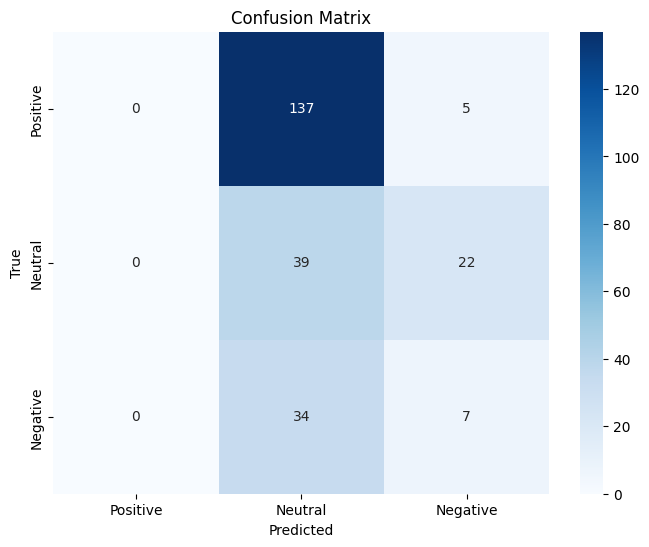

In [ ]:


# Melatih model K-Means pada data yang telah di-SMOTE
kmeans = KMeans(n_clusters= 2).fit(X_train_smote)

# Menggunakan model K-Means untuk memprediksi cluster dari df uji
predicted_clusters = kmeans.predict(X_test)

# Menentukan label untuk setiap cluster
cluster_labels = {0: 0, 1: 1, -1: -1}  # Sesuaikan dengan label yang diinginkan

# Menggunakan label cluster sebagai prediksi
predicted = [cluster_labels[cluster] for cluster in predicted_clusters]

# Menghitung matriks kebingungan
conf_matrix = confusion_matrix(y_test_numeric, predicted)
print(conf_matrix)

# Membuat visualisasi matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Mencetak laporan klasifikasi
print(classification_report(y_test_numeric, predicted))
print('===============================================\n')

# Menghitung dan mencetak akurasi
print("Accuracy:", accuracy_score(y_test_numeric, predicted))

# Menghitung dan mencetak presisi
print("Precision:", precision_score(y_test_numeric, predicted, average="weighted"))

# Menghitung dan mencetak recall
print("Recall:", recall_score(y_test_numeric, predicted, average="weighted"))

# Menghitung dan mencetak F1-score
print("F1_score:", f1_score(y_test_numeric, predicted, average="weighted"))

# Menghitung dan mencetak error rate
print("error_rate:", 1 - accuracy_score(y_test_numeric, predicted))
print('===============================================\n')

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       142
           0       0.65      0.36      0.46        61
           1       0.16      0.80      0.26        41

    accuracy                           0.23       244
   macro avg       0.27      0.39      0.24       244
weighted avg       0.19      0.23      0.16       244


Accuracy: 0.22540983606557377
Precision: 0.18816985810717732
Recall: 0.22540983606557377
F1_score: 0.15997339374168554
error_rate: 0.7745901639344263



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif